# Netflix content acquisition and strategy

[***link to dataset***](https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows)

## **Introduction**

I will explore the realm of predictive modeling for Netflix content acquisition and strategy from the perspective of a client invested in optimizing Netflix's content portfolio. In this project, I delve into the intricacies of machine learning techniques to enhance decision-making processes and drive strategic outcomes in collaboration with Netflix.

## **Objective**

As a client partnering with Netflix, my primary objective is to develop predictive models that accurately identify which movies are likely to be fast-added (added within the first year of release) to the platform. By leveraging data-driven insights and machine learning algorithms, I will aim to streamline the content acquisition process, maximize the value of our content portfolio, and ultimately enhance the viewer experience for Netflix subscribers as the added titles will be consistent what's already offered on Netflix's platform.

## Approach

1. **Data Exploration**: Analyze the dataset for relevant features such as genre, release year, duration, etc. Gain insights into the characteristics of fast-added movies and identify potential predictor variables.

2. **Data Cleaning**: Ensure data quality by handling missing values, correcting inconsistencies, and removing duplicates.

3. **Feature Engineering and Selection**: Engineer new features and select the most relevant ones for predictive modeling, ensuring alignment with Netflix's strategic objectives.

4. **Hypothesis Testing using Chi-squared**: Conduct hypothesis testing using the chi-squared test to analyze associations between categorical variables.

5. **Model Development and Evaluation**: Develop predictive models using several machine learning algorithms. Evaluate models using metrics such as accuracy, precision, recall, and F1 score.

6. **Model Interpretation and Insights**: Interpret model results and derive actionable insights.

**Focus on Predictor Variable**

Particular emphasis will be placed on identifying a predictor variable that significantly influences a movie's likelihood of being fast-added to the platform.



# Imports

*   Import packages
*   Load dataset

## Import packages

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
import scipy.stats as stats


# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import plot_importance

# Set display options
pd.set_option('display.max_columns', None)

## Load dataset

In [3]:
# Load the data set from CSV file
file_path = 'netflix_titles.csv'
df = pd.read_csv(file_path,encoding='latin-1')


# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

# Data Cleaning
- check *unnamed* columns for useable data
- check to see if `show_id` is truly unique
    - if not, confirm why not
- check for duplicate `title`
    - if not, confirm why not
- cast `data_added` into a datetime type
- Analyze `country` column
- check `duration` for missing values
- check `rating` to make sure format is consistent
- extracting relevant genres from `in_list`

## Check *unnamed* columns for useable data

In [5]:
# Display all column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
# Create an unnamed column dataframe
unnamed_columns = df[['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25']]

# Display ununamed columns for relavent information
unnamed_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 12  0 non-null      float64
 1   Unnamed: 13  0 non-null      float64
 2   Unnamed: 14  0 non-null      float64
 3   Unnamed: 15  0 non-null      float64
 4   Unnamed: 16  0 non-null      float64
 5   Unnamed: 17  0 non-null      float64
 6   Unnamed: 18  0 non-null      float64
 7   Unnamed: 19  0 non-null      float64
 8   Unnamed: 20  0 non-null      float64
 9   Unnamed: 21  0 non-null      float64
 10  Unnamed: 22  0 non-null      float64
 11  Unnamed: 23  0 non-null      float64
 12  Unnamed: 24  0 non-null      float64
 13  Unnamed: 25  0 non-null      float64
dtypes: float64(14)
memory usage: 963.6 KB


All of the unnamed columns are all null, so these columns can be dropped from the dataframe.

In [7]:
# Remove all unnamed columns
df1 = df.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],axis=1)

# Display first 5 rows
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Check to see if `show_id` is truly unique

In [8]:
# Get maximum count of appearances for a show_id
df1.show_id.value_counts().max()

1

## Check for duplicates in `title`

In [9]:
# Count the occurrences of each title
title_counts = df1.title.value_counts()

# Filter titles that appear more than once and display them
duplicate_titles = title_counts[title_counts > 1]
duplicate_titles


title
22-Jul    2
Feb-09    2
15-Aug    2
Name: count, dtype: int64

In [10]:
# Filter rows with specific titles
df1[df1['title'].isin(['15-Aug','Feb-09','22-Jul'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3962,s3963,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
3996,s3997,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
4522,s4523,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Ãigarden, Jonas Str...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5964,s5965,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Ãigarden, Jonas Str...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."


It is possible that the title could be a date. However, since these titles appear to also be duplicates, it might be best to remove them.

In [11]:
# Remove rows with those dates in the title
df1 = df1[~df1['title'].isin(['15-Aug', 'Feb-09', '22-Jul'])]

# Check for the max amount of times a title appears
df1['title'].value_counts().max()

1

In [12]:
# Count missing values in each column
df1.isna().sum()

show_id            0
type               0
title              0
director        2632
cast             825
country          829
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Change `data_added` into a datetime type

In [13]:
# Drop rows with missing values in 'date_added' column
df1 = df1.dropna(subset=['date_added'])

# Convert 'date_added' column to datetime format after stripping whitespace
df1['date_added'] = pd.to_datetime(df1['date_added'].apply(lambda x: x.strip()))

# Display DataFrame info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8793 non-null   object        
 1   type          8793 non-null   object        
 2   title         8793 non-null   object        
 3   director      6171 non-null   object        
 4   cast          7968 non-null   object        
 5   country       7965 non-null   object        
 6   date_added    8793 non-null   datetime64[ns]
 7   release_year  8793 non-null   int64         
 8   rating        8789 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8793 non-null   object        
 11  description   8793 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.0+ KB


### Create a `year_added` column

In [14]:
# Extract year from date_added
df1['year_added'] = df1['date_added'].dt.year

# Display DataFrame head
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


## Analyze `country`

In [15]:
# Get unique countries, calculate count
df1.country.unique().shape[0]

748

### Filter to relevant countries

Some entries list multiple countries (seperated by commas) instead of a single one, possibly indicating availability across multiple regions simultaneously. To analyze trends across different countries, I will filter the dataframe to focus on the top 30 individual countries.

In [16]:
# Filter for single countries, count occurrences, select top 30
top_30_countries = df1[~(df1['country'].str.contains(',')==True)]['country'].value_counts().sort_values(ascending=False).head(30)
top_30_countries

country
United States     2813
India              970
United Kingdom     418
Japan              244
South Korea        200
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           86
Taiwan              81
Indonesia           79
Brazil              77
Philippines         75
Germany             67
China               66
Thailand            61
Argentina           56
Hong Kong           53
Italy               45
Colombia            35
South Africa        30
Poland              24
Singapore           23
Malaysia            22
Netherlands         19
Pakistan            18
Name: count, dtype: int64

### Creating a top 30 countries subset

In [17]:
# Extract top countries from the top 30 list
top_countries = top_30_countries.index.tolist()

# Filter DataFrame to include only rows where 'country' is in the top countries list
df2 = df1[df1['country'].isin(top_countries)==True]

# Display DataFrame information for the filtered DataFrame
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6428 entries, 0 to 8808
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6428 non-null   object        
 1   type          6428 non-null   object        
 2   title         6428 non-null   object        
 3   director      4529 non-null   object        
 4   cast          5881 non-null   object        
 5   country       6428 non-null   object        
 6   date_added    6428 non-null   datetime64[ns]
 7   release_year  6428 non-null   int64         
 8   rating        6425 non-null   object        
 9   duration      6425 non-null   object        
 10  listed_in     6428 non-null   object        
 11  description   6428 non-null   object        
 12  year_added    6428 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 678.0+ KB


## Check for missing values  in `duration`

In [18]:
# Check duration column for missing values
df2[df2['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016


It appears that the duration data landed in `rating` columns causing `duration` column have missing values. since there is only 3 columns, I will remove the columns.

In [19]:
# Filter DataFrame to exclude rows with missing values in the 'duration' column
df2 = df2[~df2['duration'].isna()]

In [20]:
# Check rating column for missing values
df2[df2['rating'].isna()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, OisÃ­n...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017


Since only three rows in this subset have missing values in the rating column, they will also be removed.

In [21]:
# Filter DataFrame to exclude rows with missing values in the 'rating' column
df2 = df2[~df2['rating'].isna()]

# Display DataFrame information after filtering
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6422 entries, 0 to 8808
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6422 non-null   object        
 1   type          6422 non-null   object        
 2   title         6422 non-null   object        
 3   director      4525 non-null   object        
 4   cast          5875 non-null   object        
 5   country       6422 non-null   object        
 6   date_added    6422 non-null   datetime64[ns]
 7   release_year  6422 non-null   int64         
 8   rating        6422 non-null   object        
 9   duration      6422 non-null   object        
 10  listed_in     6422 non-null   object        
 11  description   6422 non-null   object        
 12  year_added    6422 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 677.3+ KB


## Extracting relevant genres from `in_listed`

In [22]:
# Count the occurrences of each value in the 'listed_in' column and display the top 20
df2['listed_in'].value_counts().head(20)


listed_in
Stand-Up Comedy                                     297
Documentaries                                       296
Dramas, International Movies                        255
Comedies, Dramas, International Movies              217
Dramas, Independent Movies, International Movies    158
Dramas, International Movies, Romantic Movies       147
Comedies, International Movies                      135
Comedies, International Movies, Romantic Movies     131
Children & Family Movies, Comedies                  119
Kids' TV                                            117
Children & Family Movies                            111
Comedies, Dramas, Independent Movies                101
Dramas                                               98
Documentaries, International Movies                  96
Comedies                                             94
Action & Adventure, Dramas, International Movies     91
Dramas, International Movies, Thrillers              88
Reality TV                            

### Multi-hot encoding for various Genres

The `listed_in` column contains various genres. Creating multi-hot encoding columns for the most popular genres on Netflix might be the easiest way to classify each entry."

In [23]:
# Define common genres Netflix for multi-hot encoding
common_genres = ['drama', 'comedy', 'action & adventure', 'thriller', 'crime', 'sci-fi & fantasy',
                 'horror', 'romance', 'documentary', 'animation', 'family', 'mystery', 'reality tv',"kids tv"]

# Create binary columns for each genre
for genre in common_genres:
    df2[genre.lower()] = df2['listed_in'].apply(lambda x: 1 if genre in x.lower() else 0)

# For specific genres, apply additional conditions
df2['documentary'] = df2['listed_in'].apply(lambda x: 1 if any(genre in x.lower() for genre in ['documentaries', 'docuseries', 'documentary']) else 0)
df2['romance'] = df2['listed_in'].apply(lambda x: 1 if any(genre in x.lower() for genre in ['romantic','romance']) else 0)
df2['comedy'] = df2['listed_in'].apply(lambda x: 1 if any(genre in x.lower() for genre in ['comedies','comedy']) else 0)
df2['mystery'] = df2['listed_in'].apply(lambda x: 1 if any(genre in x.lower() for genre in ['mystery','mysteries']) else 0)
df2['animation'] = df2['listed_in'].apply(lambda x: 1 if any(genre in x.lower() for genre in ['animation','anime','cartoon']) else 0)
df2['sci-fi & fantasy'] = df2['listed_in'].apply(lambda x: 1 if any(genre in x.lower() for genre in ['sci-fi','fantasy','sci-fi & fantasy']) else 0)
df2["kids tv"] = df2['listed_in'].apply(lambda x: 1 if any(genre in x.lower() for genre in ["kids' tv"]) else 0)

# Display DataFrame after multi-hot encoding
df2.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,drama,comedy,action & adventure,thriller,crime,sci-fi & fantasy,horror,romance,documentary,animation,family,mystery,reality tv,kids tv
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,0,1,0,0,0,0,0,1,0,0,0,0,0,0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0


### Filling missing values in the genre columns with 0

In [24]:
# Create a dictionary to fill missing values with 0 for each common genre
fill_values = {col: 0 for col in common_genres}

# Fill missing values in DataFrame with 0 for each common genre
df2.fillna(value=fill_values, inplace=True)

# Display the last 10 rows of the DataFrame after filling missing values
df2.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,drama,comedy,action & adventure,thriller,crime,sci-fi & fantasy,horror,romance,documentary,animation,family,mystery,reality tv,kids tv
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,0,1,0,0,0,0,1,0,0,0,0,0,0,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,2024-04-05,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...,2024,0,0,0,0,0,1,1,0,0,0,0,0,0,0
8808,s8809,Movie,Serena,Susanne Bier,"Bradley Cooper, Jennifer Lawrence, Toby Jones,...",United States,2024-04-05,2014,A,110 min,"Drama, Romance, Thriller","In the 1920s, a newly married couple attempt t...",2024,1,0,0,1,0,0,0,1,0,0,0,0,0,0


### Extract Top Genres from Multi-Hot Encoded DataFrame

In [25]:
# Filter DataFrame to include only genre columns
df2_genres = df2[common_genres]

# Transform multi-hot encoded columns to lists containing column names with value 1
df2_genres['genre'] = df2_genres.apply(lambda x: ', '.join(x.index[x == 1]), axis=1)

# Create a new DataFrame with the 'genre' column and relevant columns from df2
df3 = pd.concat([df2_genres['genre'], df2.drop(columns=common_genres)], axis=1)

# Create a list of the top 20 genres
relevant_genres = df2_genres['genre'].value_counts().head(20).index.tolist()

# Filter DataFrame to include only rows with relevant genres
df3 = df3[df3['genre'].isin(relevant_genres)]

# Drop unnecessary columns
df3 = df3.drop(columns=['show_id', 'title', 'director', 'cast', 'listed_in', 'description']).reset_index(drop=True)

# Replace empty strings in the 'genre' column with 'other'
df3['genre'] = df3['genre'].replace('', 'other')

df3.head()

/var/folders/2n/0wp276tx0z7c361lrc9t_nlm0000gn/T/ipykernel_42508/649887591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_genres['genre'] = df2_genres.apply(lambda x: ', '.join(x.index[x == 1]), axis=1)


,genre,type,country,date_added,release_year,rating,duration,year_added
0,documentary,Movie,United States,2021-09-25,2020,PG-13,90 min,2021
1,"comedy, romance",TV Show,India,2021-09-24,2021,TV-MA,2 Seasons,2021
2,reality tv,TV Show,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,2021
3,"drama, comedy",Movie,United States,2021-09-24,2021,PG-13,104 min,2021
4,"drama, comedy",TV Show,United States,2021-09-22,2021,TV-MA,4 Seasons,2021


## Feature Engineering

- create feature to analyze seasonality
- transform feature(s) to analyze speed titles are added to netflix
- extract data for `movie_duration` and `tv_season_count`
- create outcome variable to assign `fast_add`

### Create feature to analyze seasonality

In [26]:
# Define a function to get the season based on the month of the date
def get_season(date):
    month = date.month
    
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the get_season function to the 'date_added' column to create a new 'season_added' column
df3['season_added'] = df3['date_added'].apply(get_season)

# Display the DataFrame after adding the 'season_added' column
df3.head()


,genre,type,country,date_added,release_year,rating,duration,year_added,season_added
0,documentary,Movie,United States,2021-09-25,2020,PG-13,90 min,2021,Fall
1,"comedy, romance",TV Show,India,2021-09-24,2021,TV-MA,2 Seasons,2021,Fall
2,reality tv,TV Show,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,2021,Fall
3,"drama, comedy",Movie,United States,2021-09-24,2021,PG-13,104 min,2021,Fall
4,"drama, comedy",TV Show,United States,2021-09-22,2021,TV-MA,4 Seasons,2021,Fall


### Analyze Add Speed

In [27]:
# Count the occurrences of each year in the 'year_added' column
df3['year_added'].value_counts()


year_added
2019    1288
2020    1163
2018    1062
2017     798
2021     709
2016     278
2015      52
2014      11
2011      11
2013       6
2012       2
2008       2
2009       1
2010       1
Name: count, dtype: int64

### Age Calculation

In [28]:
# Define a function to calculate the age based on the year
def get_age(year):
    age = 2024 - year
    return age

# Calculate the age when added to Netflix and the age at release
df3['age_added'] = df3['year_added'].apply(get_age)
df3['release_age'] = df3['release_year'].apply(get_age)

# Define a function to calculate the speed at which the content was added to Netflix
def get_speed_added(release_year, added_year):
    if release_year < 2007:  # Check if release year is before 2007
        speed = added_year - 2007
    else:
        speed = get_age(release_year) - get_age(added_year)

    if speed < 0:
        speed = 0
    return speed

# Apply the function to each row to calculate the speed added
df3['speed_added'] = df3.apply(lambda row: get_speed_added(row['release_year'], row['year_added']), axis=1)

# Display the DataFrame after adding the new columns
df3.head(20)


,genre,type,country,date_added,release_year,rating,duration,year_added,season_added,age_added,release_age,speed_added
0,documentary,Movie,United States,2021-09-25,2020,PG-13,90 min,2021,Fall,3,4,1
1,"comedy, romance",TV Show,India,2021-09-24,2021,TV-MA,2 Seasons,2021,Fall,3,3,0
2,reality tv,TV Show,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,2021,Fall,3,3,0
3,"drama, comedy",Movie,United States,2021-09-24,2021,PG-13,104 min,2021,Fall,3,3,0
4,"drama, comedy",TV Show,United States,2021-09-22,2021,TV-MA,4 Seasons,2021,Fall,3,3,0
5,"drama, crime",TV Show,Mexico,2021-09-22,2020,TV-MA,2 Seasons,2021,Fall,3,4,1
6,"drama, action & adventure",TV Show,Turkey,2021-09-22,2018,TV-14,5 Seasons,2021,Fall,3,6,3
7,"comedy, romance",Movie,India,2021-09-21,1998,TV-14,166 min,2021,Fall,3,26,14
8,comedy,Movie,United States,2021-09-20,2010,PG-13,103 min,2021,Fall,3,14,11
9,comedy,TV Show,United Kingdom,2021-09-17,2020,TV-MA,3 Seasons,2021,Fall,3,4,1


### Extract TV Season Count and Moive duration

In [29]:
# Extract the number of TV seasons from the 'duration' column and handle missing values
df3['tv_season_count'] = df3['duration'].apply(lambda x: x.replace(' Seasons', '').replace(' Season', '') if 'Season' in x else 0).astype('int')

# Extract the duration of movies in minutes from the 'duration' column and handle missing values
df3['movie_duration'] = df3['duration'].str.replace(' min','').apply(lambda x: 0 if 'Season' in x else x).astype('int')

df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   genre            5384 non-null   object        
 1   type             5384 non-null   object        
 2   country          5384 non-null   object        
 3   date_added       5384 non-null   datetime64[ns]
 4   release_year     5384 non-null   int64         
 5   rating           5384 non-null   object        
 6   duration         5384 non-null   object        
 7   year_added       5384 non-null   int32         
 8   season_added     5384 non-null   object        
 9   age_added        5384 non-null   int64         
 10  release_age      5384 non-null   int64         
 11  speed_added      5384 non-null   int64         
 12  tv_season_count  5384 non-null   int64         
 13  movie_duration   5384 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(6)

In [30]:
# Check for imbalance by counting the occurrences of each type (Movie or TV Show) in the DataFrame
df3['type'].value_counts()

type
Movie      3945
TV Show    1439
Name: count, dtype: int64

In [31]:
# Print the number of entries with 'min' in the 'duration' column (indicating movies)
print(df3[df3['duration'].str.contains('min')].shape[0])

# Print the number of entries with 'Season' in the 'duration' column (indicating TV shows)
print(df3[df3['duration'].str.contains('Season')].shape[0])

3945
1439


### Create outcome variable `fast_add`

`fast_add` will analyze the factors that determine if a show or movie will be added quickly to netflix.
for this project "fast" will be considered any title added to Netflix within 1 year of it's release (or 1 year of when netflix began streaming in 2007)


In [32]:
# Create a binary column indicating if content was added to Netflix quickly (within 1 year)
df3['fast_add'] = df3['speed_added'].apply(lambda x: 1 if x <= 1 else 0)

# Display the 'speed_added' and 'fast_add' columns for the first 20 rows
df3[['speed_added', 'fast_add']].head(10)


,speed_added,fast_add
0,1,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,1
6,3,0
7,14,0
8,11,0
9,1,1


In [33]:
# Count the occurrences of each value in the 'fast_add' column (1 for quickly added, 0 otherwise)
df3.fast_add.value_counts()

fast_add
1    2933
0    2451
Name: count, dtype: int64

# Exploratory Data Analysis

**Questions:**

- are there any outliers in the `speed_added` column for each country? what about `release_age` column?
- which countries have the most releases per seasonality?
- does the seasons fall an expected distribution or is there significant difference between the frequeceny of releases? Chi-2 test
- which `rating` sees the fastest `speed_added` for each season?
- does `seasons_count` affect how fast a show is added to netflix?

## Plot top countries, ratings, and genres for movies and TV shows to compare frequencies.

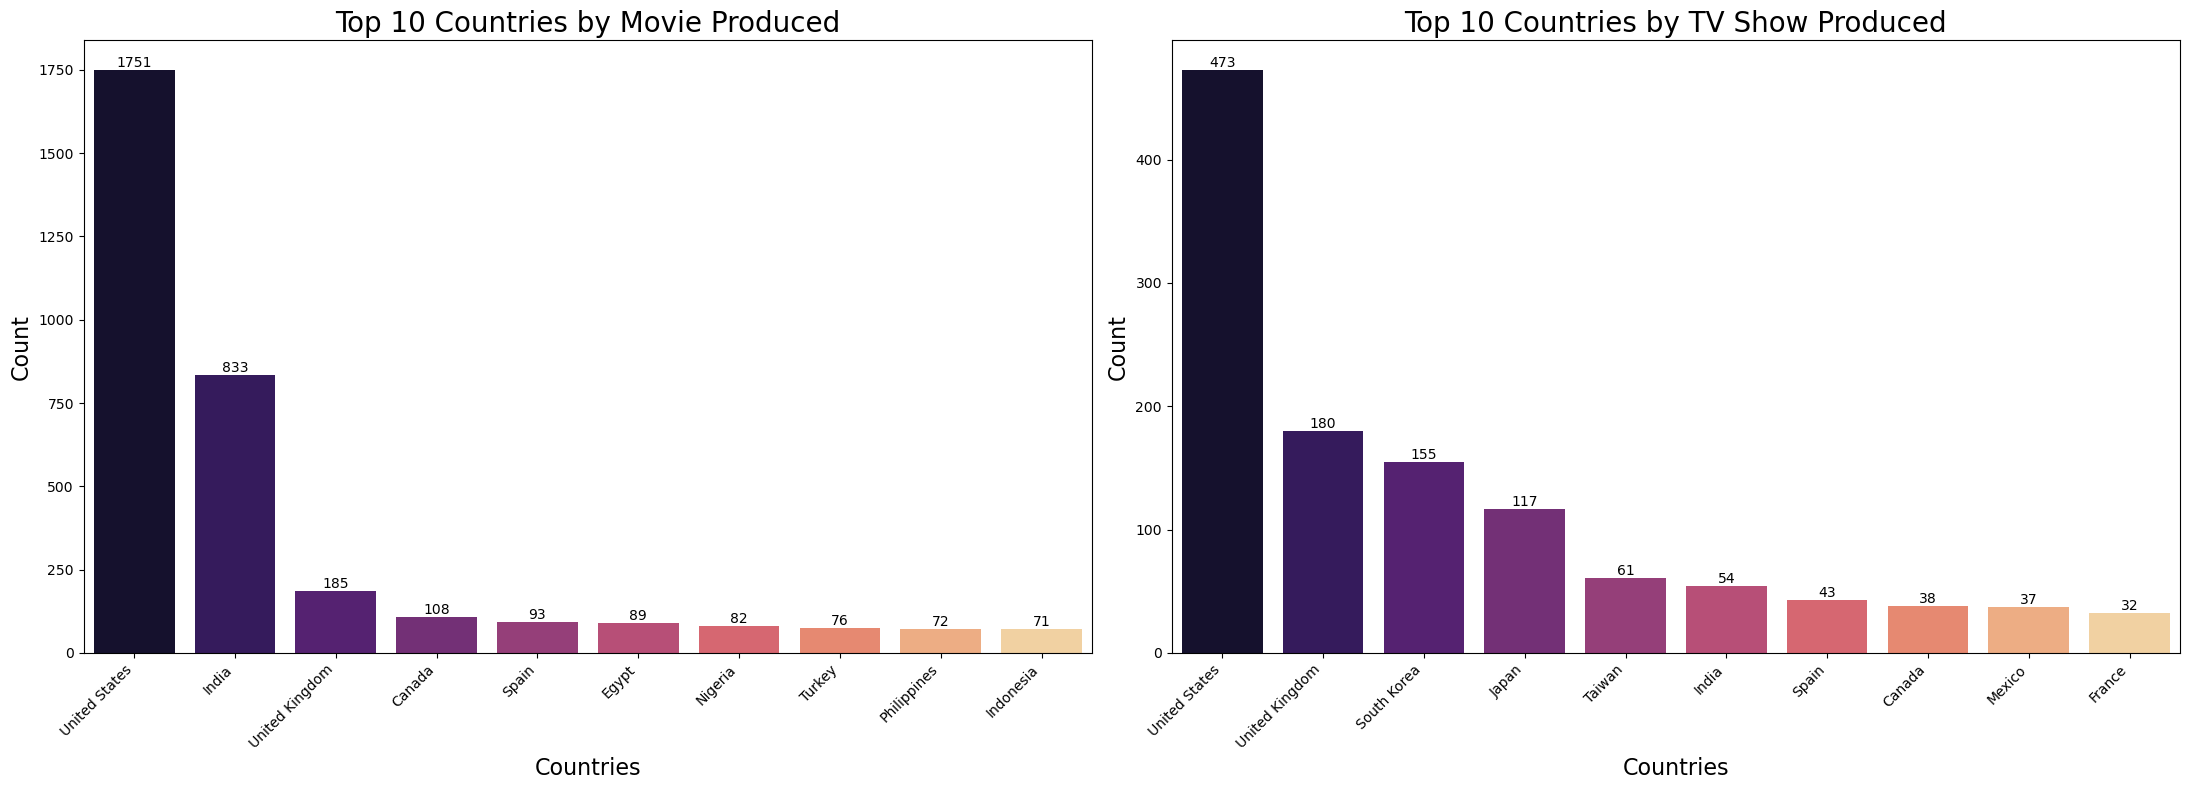

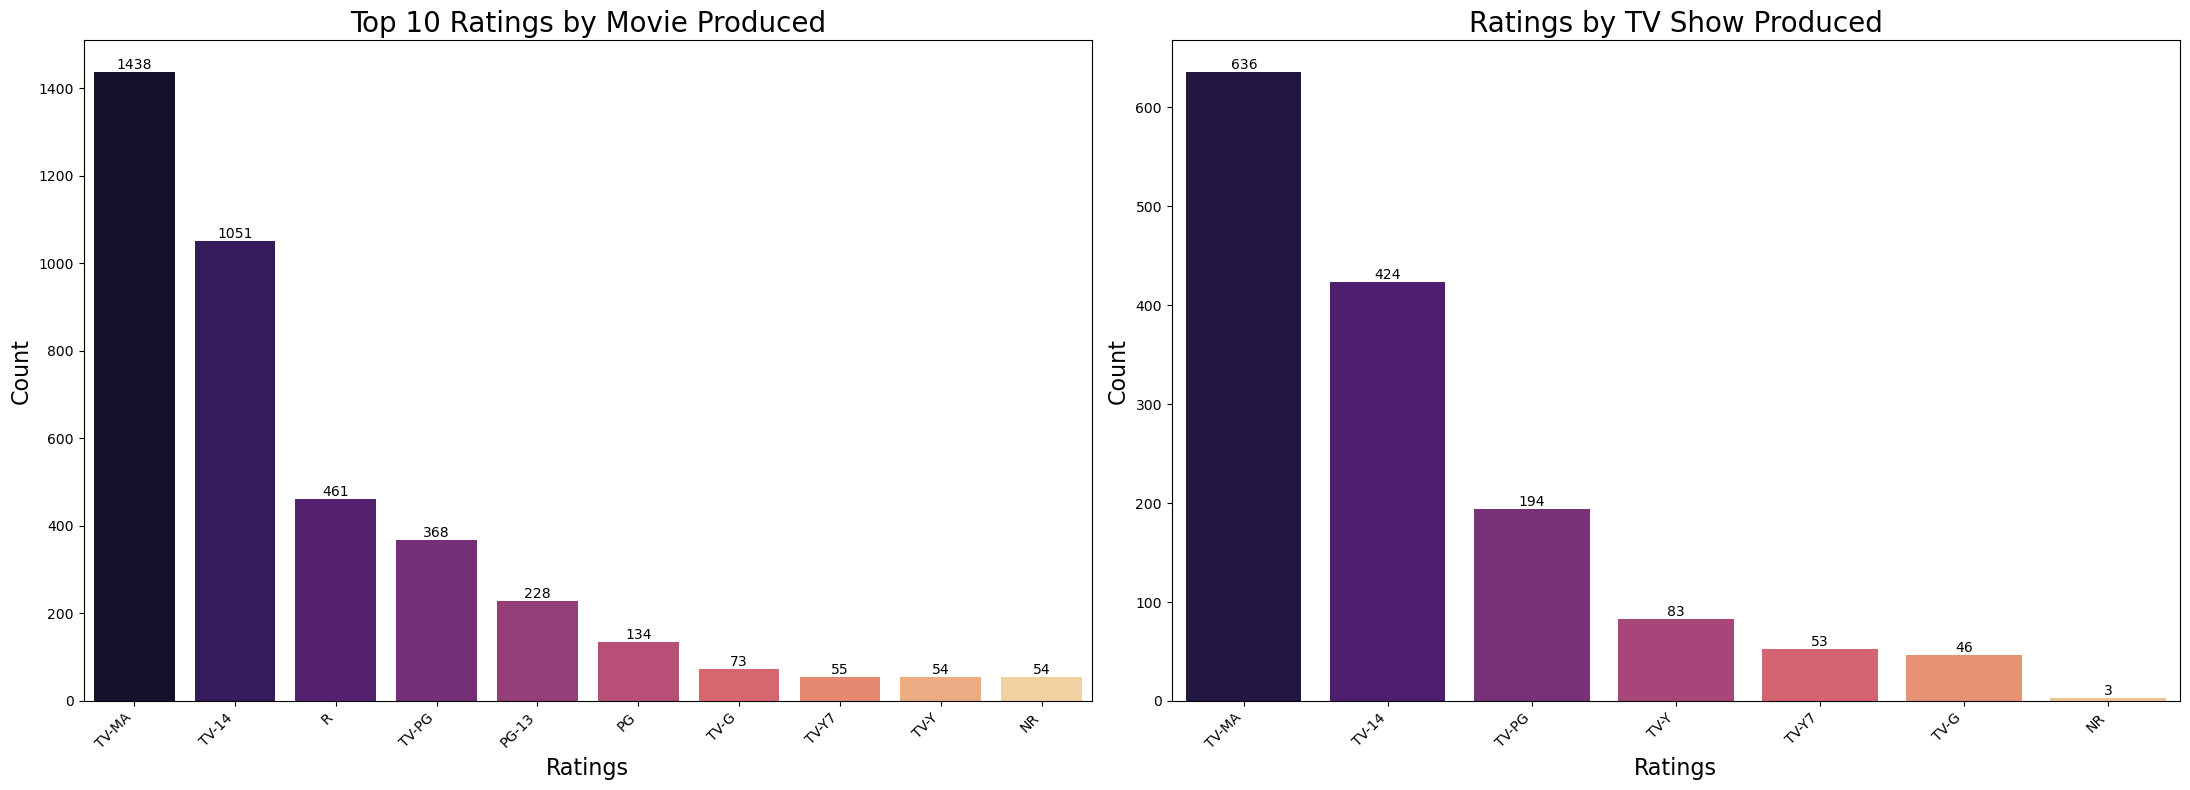

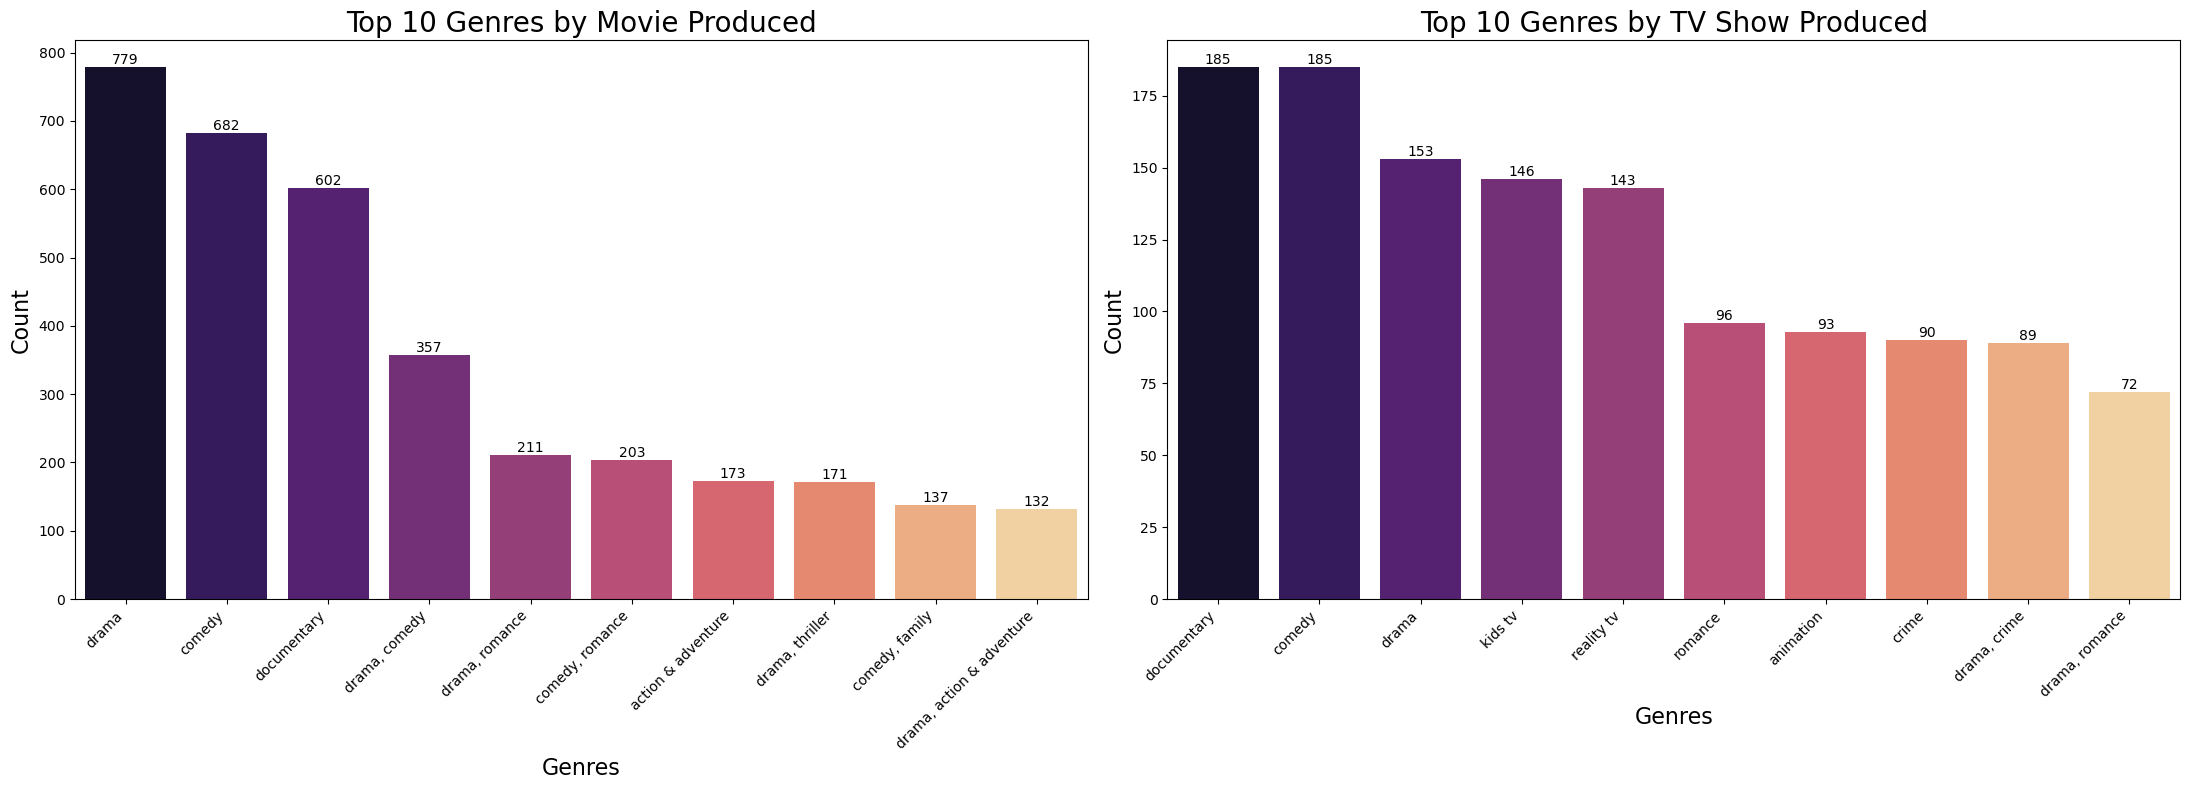

In [34]:
def plot_count_by_type(data, content_type, column, title, index, ax):
    # Filter data by the specified content type and get the counts for the column
    subset = data[data['type'] == content_type][column].value_counts()
    top_n = subset.head(10) if len(subset) > 10 else subset

    # Plot the count plot
    sns.barplot(x=top_n.index, y=top_n, palette='magma', ax=ax[index])

    # Set plot title and labels
    n_label = 'Top 10 ' if len(top_n) == 10 else ''
    ax[index].set_title(f'{n_label}{title} by {content_type} Produced', fontsize=20)
    ax[index].set_xlabel(title, fontsize=16)
    ax[index].set_ylabel('Count', fontsize=16)
    
    # Rotate and align x-tick labels
    ax[index].set_xticks(range(len(top_n.index)))
    ax[index].set_xticklabels(top_n.index, rotation=45, ha='right')

    # Add bar labels
    for container in ax[index].containers:
        ax[index].bar_label(container)

# Define the parameters for the different plots
plot_params = [
    {'column': 'country', 'title': 'Countries'},
    {'column': 'rating', 'title': 'Ratings'},
    {'column': 'genre', 'title': 'Genres'}
]

# Create plots for each parameter set
for params in plot_params:
    fig, ax = plt.subplots(1, 2, figsize=(22, 8))
    plot_count_by_type(df3, 'Movie', params['column'], params['title'], 0, ax)
    plot_count_by_type(df3, 'TV Show', params['column'], params['title'], 1, ax)
    plt.tight_layout()
    plt.show()

Most of the title originate from the Unitied States.
India favors movies while UK and Korea favors TV shows
Most titles are for mature audiences.
The top 3 most frequent genres for both TV and Movies are drama, comedy and documentaries.

## Distribution of Speed Added to Netflix

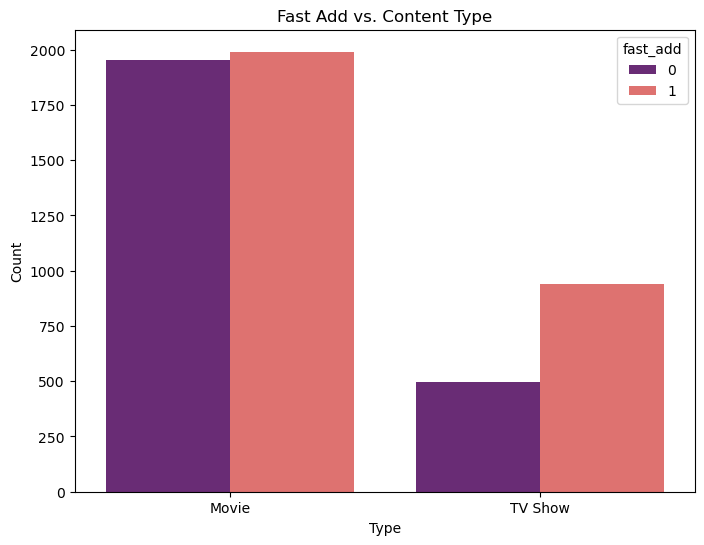

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='fast_add', data=df3,palette='magma')
plt.title('Fast Add vs. Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Netflix seems to add more TV shows that get added within their first year of release.

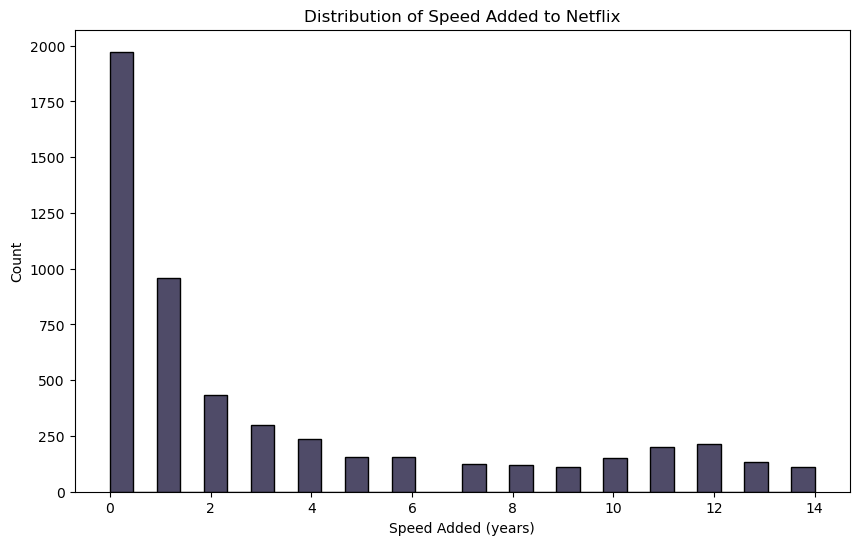

In [36]:
# Choose a color from the magma palette
magma_palette = sns.color_palette("magma", as_cmap=True)

# Create the histogram with the chosen color
plt.figure(figsize=(10, 6))
sns.histplot(df3['speed_added'], kde=False, bins=30, color=magma_palette(0.1))
plt.title('Distribution of Speed Added to Netflix')
plt.xlabel('Speed Added (years)')
plt.ylabel('Count')
plt.show()



Most title Netflix are added withn the first year of their release.

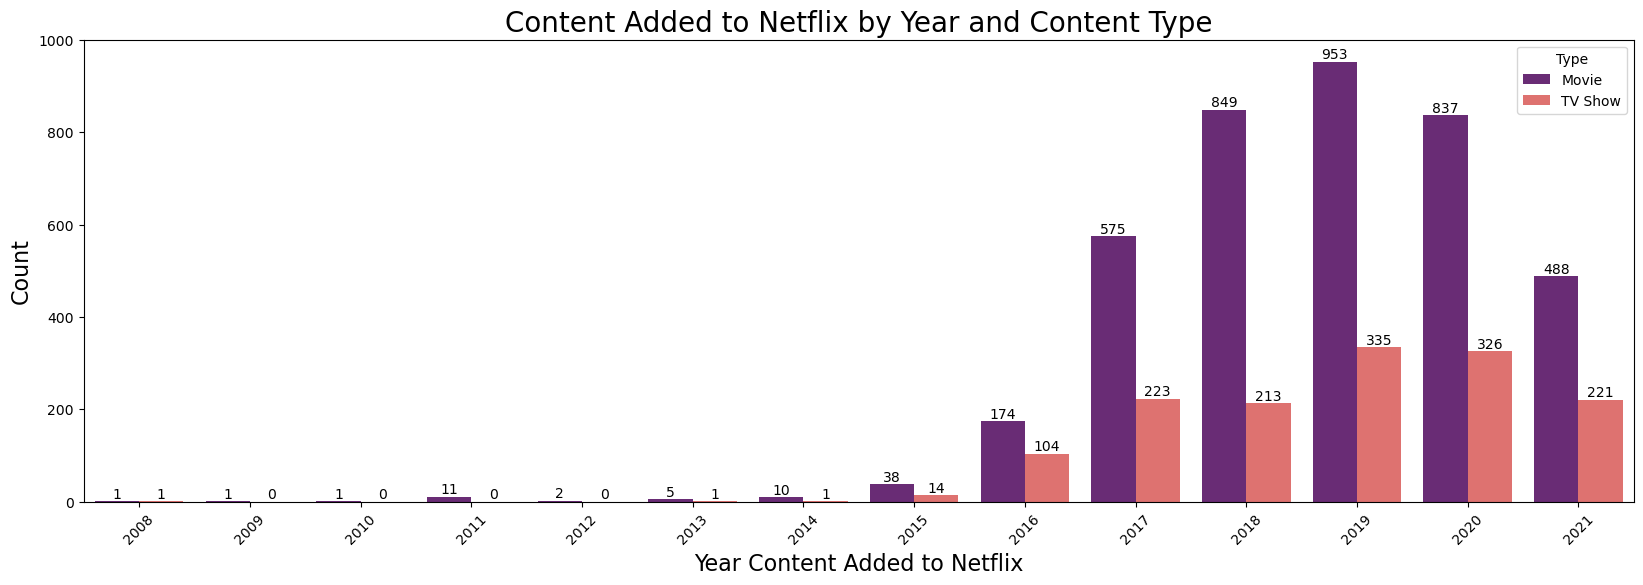

In [37]:
shows_added = df3.groupby(['year_added', 'type']).size().unstack(fill_value=0)
shows_added = shows_added.reset_index()
shows_added = shows_added.melt(id_vars='year_added', var_name='Type', value_name='Count')

plt.figure(figsize=(20,6))
plt.title('Content Added to Netflix by Year and Content Type', fontsize=20)
ax = sns.barplot(x=shows_added['year_added'], y=shows_added['Count'], hue=shows_added['Type'], palette='magma')
plt.xlabel('Year Content Added to Netflix', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

Most titles were added during 2019 within this data set.

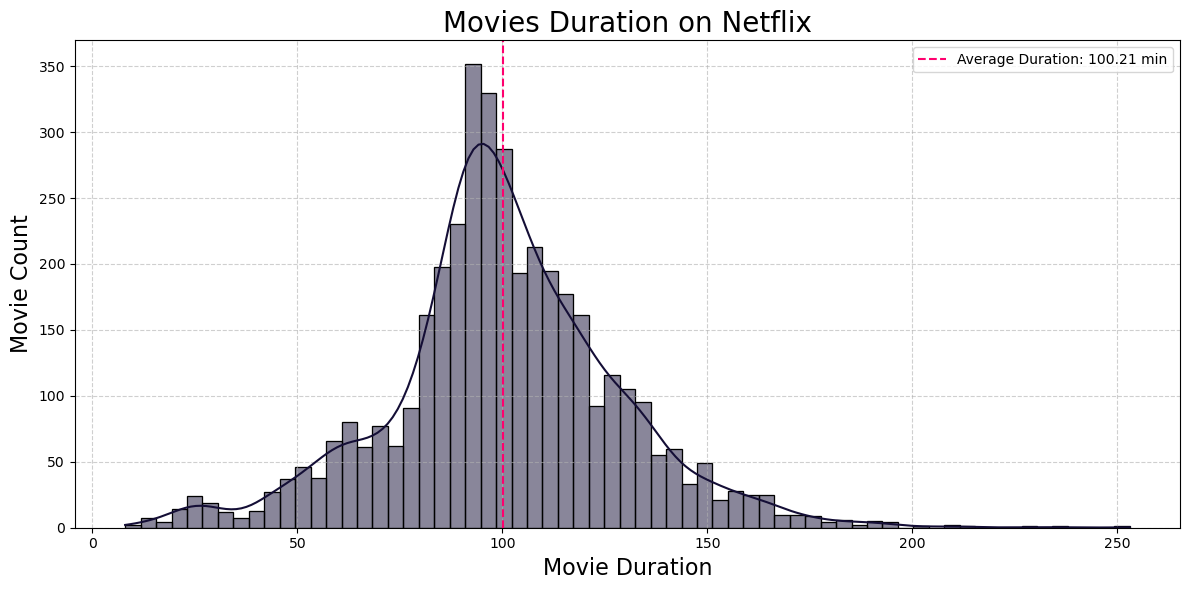

In [38]:
movies = df3[df3['type'] == 'Movie']
avg_duration = round(np.mean(movies['movie_duration']),2)

plt.figure(figsize=(12,6))
plt.title('Movies Duration on Netflix', fontsize=20)
sns.histplot(movies['movie_duration'], kde=True,color=magma_palette(0.1))
plt.axvline(x=avg_duration, color='#ff006e', linestyle='--', label=f'Average Duration: {avg_duration:.2f} min')
plt.xlabel('Movie Duration', fontsize=16)
plt.ylabel('Movie Count', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

On average, movies that are selected to be added to Netflix run for about 100 minutes

# Hypothesis Testing
*   Perform a Chi-squared test to assess the association between genre and fast add on Netflix.
*   Perform Chi-squared goodness-of-fit test to compare observed and expected genre frequencies.
*   Perform a Chi-squared test to assess the association between seasons and fast add on Netflix.
*   Perform Chi-squared goodness-of-fit test to compare observed and expected seaons frequencies.

## Perform a Chi-squared test of independence to assess the association between genre and fast addition on Netflix.

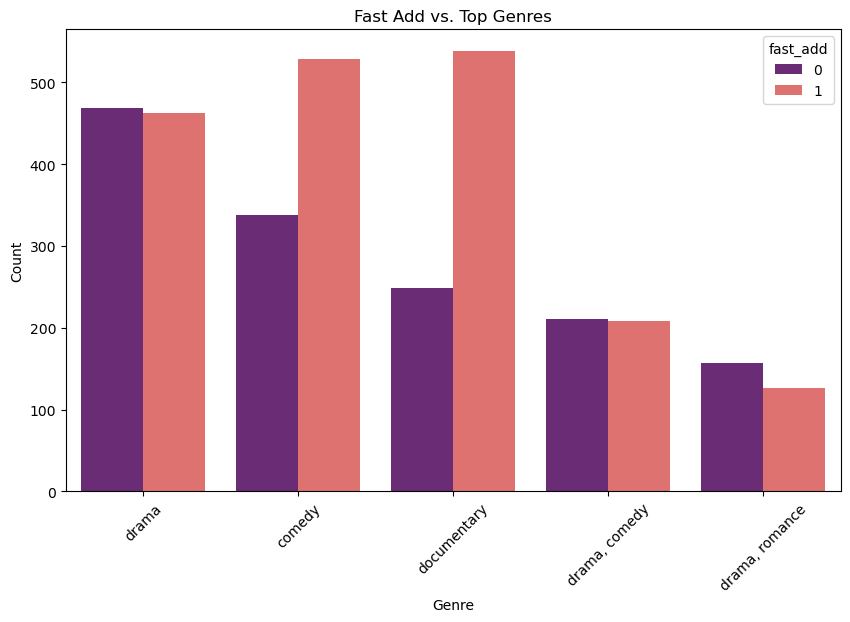

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', hue='fast_add', data=df3, order=df3['genre'].value_counts().index[:5],palette='magma')
plt.title('Fast Add vs. Top Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Filter to include only the top 5 genres
top_5_genres = df3['genre'].value_counts().index[:5]
filtered_df = df3[df3['genre'].isin(top_5_genres)]

# Create a contingency table
ct = pd.crosstab(filtered_df['genre'], filtered_df['fast_add'])

chi2, p, dof, expected = stats.chi2_contingency(ct)


# Print the results of the Chi-squared test
print("\nChi-squared Test Results:")
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Determine if the p-value is significant
alpha = 0.05
if p < alpha:
    print("\nThe p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a significant association between 'genre' and 'fast_add'.")
else:
    print("\nThe p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.")
    print("There is no significant association between 'genre' and 'fast_add'.")



Chi-squared Test Results:
Chi-squared Statistic: 94.46990580746976
P-value: 1.4773468134782745e-19
Degrees of Freedom: 4
Expected Frequencies:
[[375.48905109 491.51094891]
 [340.84184915 446.15815085]
 [403.63990268 528.36009732]
 [181.46472019 237.53527981]
 [122.56447689 160.43552311]]

The p-value is less than 0.05, so we reject the null hypothesis.
There is a significant association between 'genre' and 'fast_add'.


## Perform Chi-squared goodness-of-fit test to compare observed and expected genre frequencies.


In [41]:
# Calculate the observed frequencies for each of the top genres
observed_frequencies = df3['genre'].value_counts().head()
print(f"Observed Frequencies: {observed_frequencies}")

# Define the expected frequencies
# If we expect each top genre to be equally likely
total = observed_frequencies.sum()
num_genre = observed_frequencies.size
expected_frequencies = [total / num_genre] * num_genre
print(f"\nExpected Frequencies (assuming equal distribution): {expected_frequencies}")

# Perform Chi-squared goodness-of-fit test
chi2, p = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print the results of the Chi-squared goodness-of-fit test
print("\nChi-squared Goodness-of-Fit Test Results:")
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Determine if the p-value is significant
alpha = 0.05
if p < alpha:
    print("\nThe p-value is less than 0.05, so we reject the null hypothesis.")
    print("The distribution of the genres does not match the expected equal distribution.")
else:
    print("\nThe p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.")
    print("The distribution of the genres matches the expected equal distribution.")


Observed Frequencies: genre
drama             932
comedy            867
documentary       787
drama, comedy     419
drama, romance    283
Name: count, dtype: int64

Expected Frequencies (assuming equal distribution): [657.6, 657.6, 657.6, 657.6, 657.6]

Chi-squared Goodness-of-Fit Test Results:
Chi-squared Statistic: 506.6046228710462
P-value: 2.497780080569227e-108

The p-value is less than 0.05, so we reject the null hypothesis.
The distribution of the genres does not match the expected equal distribution.


## Perform a Chi-squared test to assess the association between seasons and fast add on Netflix.


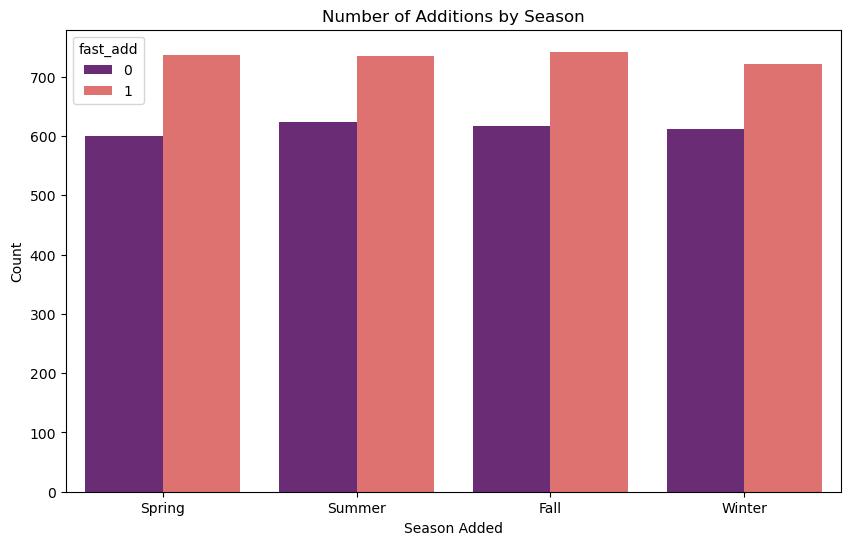

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='season_added', data=df3, hue='fast_add', order=['Spring', 'Summer', 'Fall', 'Winter'],palette='magma')
plt.title('Number of Additions by Season')
plt.xlabel('Season Added')
plt.ylabel('Count')
plt.show()

In [43]:
# Create a contingency table
contingency_table = pd.crosstab(df3['season_added'], df3['fast_add'])
print("Contingency Table (Observed Frequencies):")
print(contingency_table)

# Perform Chi-squared test to get the expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results of the Chi-squared test
print("\nChi-squared Test Results:")
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Determine if the p-value is significant
alpha = 0.05
if p < alpha:
    print("\nThe p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a significant association between 'season_added' and 'fast_add'.")
else:
    print("\nThe p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.")
    print("There is no significant association between 'season_added' and 'fast_add'.")


Contingency Table (Observed Frequencies):
fast_add        0    1
season_added          
Fall          617  742
Spring        600  736
Summer        623  734
Winter        611  721

Chi-squared Test Results:
Chi-squared Statistic: 0.3574549997895471
P-value: 0.9488840157438315
Degrees of Freedom: 3
Expected Frequencies:
[[618.66809064 740.33190936]
 [608.19762259 727.80237741]
 [617.75761516 739.24238484]
 [606.37667162 725.62332838]]

The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.
There is no significant association between 'season_added' and 'fast_add'.


## Perform Chi-squared goodness-of-fit test to compare observed and expected seaons frequencies.

In [44]:
# Calculate the observed frequencies for each season
observed_frequencies = df3['season_added'].value_counts().sort_index()
print(f"Observed Frequencies: {observed_frequencies}")

# Define the expected frequencies
# If we expect each season to be equally likely
total = observed_frequencies.sum()
num_seasons = observed_frequencies.size
expected_frequencies = [total / num_seasons] * num_seasons
print(f"\nExpected Frequencies (assuming equal distribution): {expected_frequencies}")

# Perform Chi-squared goodness-of-fit test
chi2, p = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print the results of the Chi-squared goodness-of-fit test
print("\nChi-squared Goodness-of-Fit Test Results:")
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Determine if the p-value is significant
alpha = 0.05
if p < alpha:
    print("\nThe p-value is less than 0.05, so we reject the null hypothesis.")
    print("The distribution of the seasons does not match the expected equal distribution.")
else:
    print("\nThe p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.")
    print("The distribution of the seasons matches the expected equal distribution.")


Observed Frequencies: season_added
Fall      1359
Spring    1336
Summer    1357
Winter    1332
Name: count, dtype: int64

Expected Frequencies (assuming equal distribution): [1346.0, 1346.0, 1346.0, 1346.0]

Chi-squared Goodness-of-Fit Test Results:
Chi-squared Statistic: 0.43536404160475484
P-value: 0.9328440154358044

The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.
The distribution of the seasons matches the expected equal distribution.


# Outlier Detection

*   detect outliers in speed added

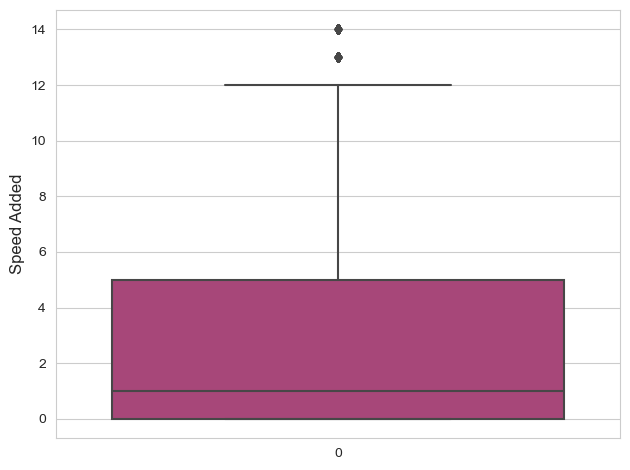

In [45]:
# Set style
sns.set_style("whitegrid")

# Customize boxplot
sns.boxplot(df3['speed_added'],palette='magma')
plt.ylabel('Speed Added', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

outliers seem to be anything over 12 year

In [46]:
# Calculate the 75th and 25th percentiles of 'speed_added'
percentile75 = df3['speed_added'].quantile(.75)
percentile25 = df3['speed_added'].quantile(.25)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate upper and lower bounds for outliers detection using the IQR method
upper = percentile75 + 1.5 * iqr
lower = percentile25 - 1.5 * iqr

# Identify outliers based on the upper and lower bounds
speed_outliers = df3[(df3['speed_added'] > upper) | (df3['speed_added'] < lower)]

# Display the first few rows of the DataFrame containing outliers
speed_outliers.describe()


,date_added,release_year,year_added,age_added,release_age,speed_added,tv_season_count,movie_duration,fast_add
count,244,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.0
mean,2020-12-04 01:28:31.475409920,1996.581967,2020.508197,3.491803,27.418033,13.454918,0.344262,108.557377,0.0
min,2020-01-01 00:00:00,1954.000000,2020.000000,3.000000,16.000000,13.000000,0.000000,0.000000,0.0
25%,2020-06-01 00:00:00,1993.000000,2020.000000,3.000000,19.000000,13.000000,0.000000,94.000000,0.0
50%,2021-01-01 00:00:00,2000.000000,2021.000000,3.000000,24.000000,13.000000,0.000000,108.500000,0.0
75%,2021-07-01 00:00:00,2005.000000,2021.000000,4.000000,31.000000,14.000000,0.000000,129.000000,0.0
max,2021-09-21 00:00:00,2008.000000,2021.000000,4.000000,70.000000,14.000000,8.000000,253.000000,0.0
std,NaN,11.453495,0.500960,0.500960,11.453495,0.498987,1.271857,44.871293,0.0


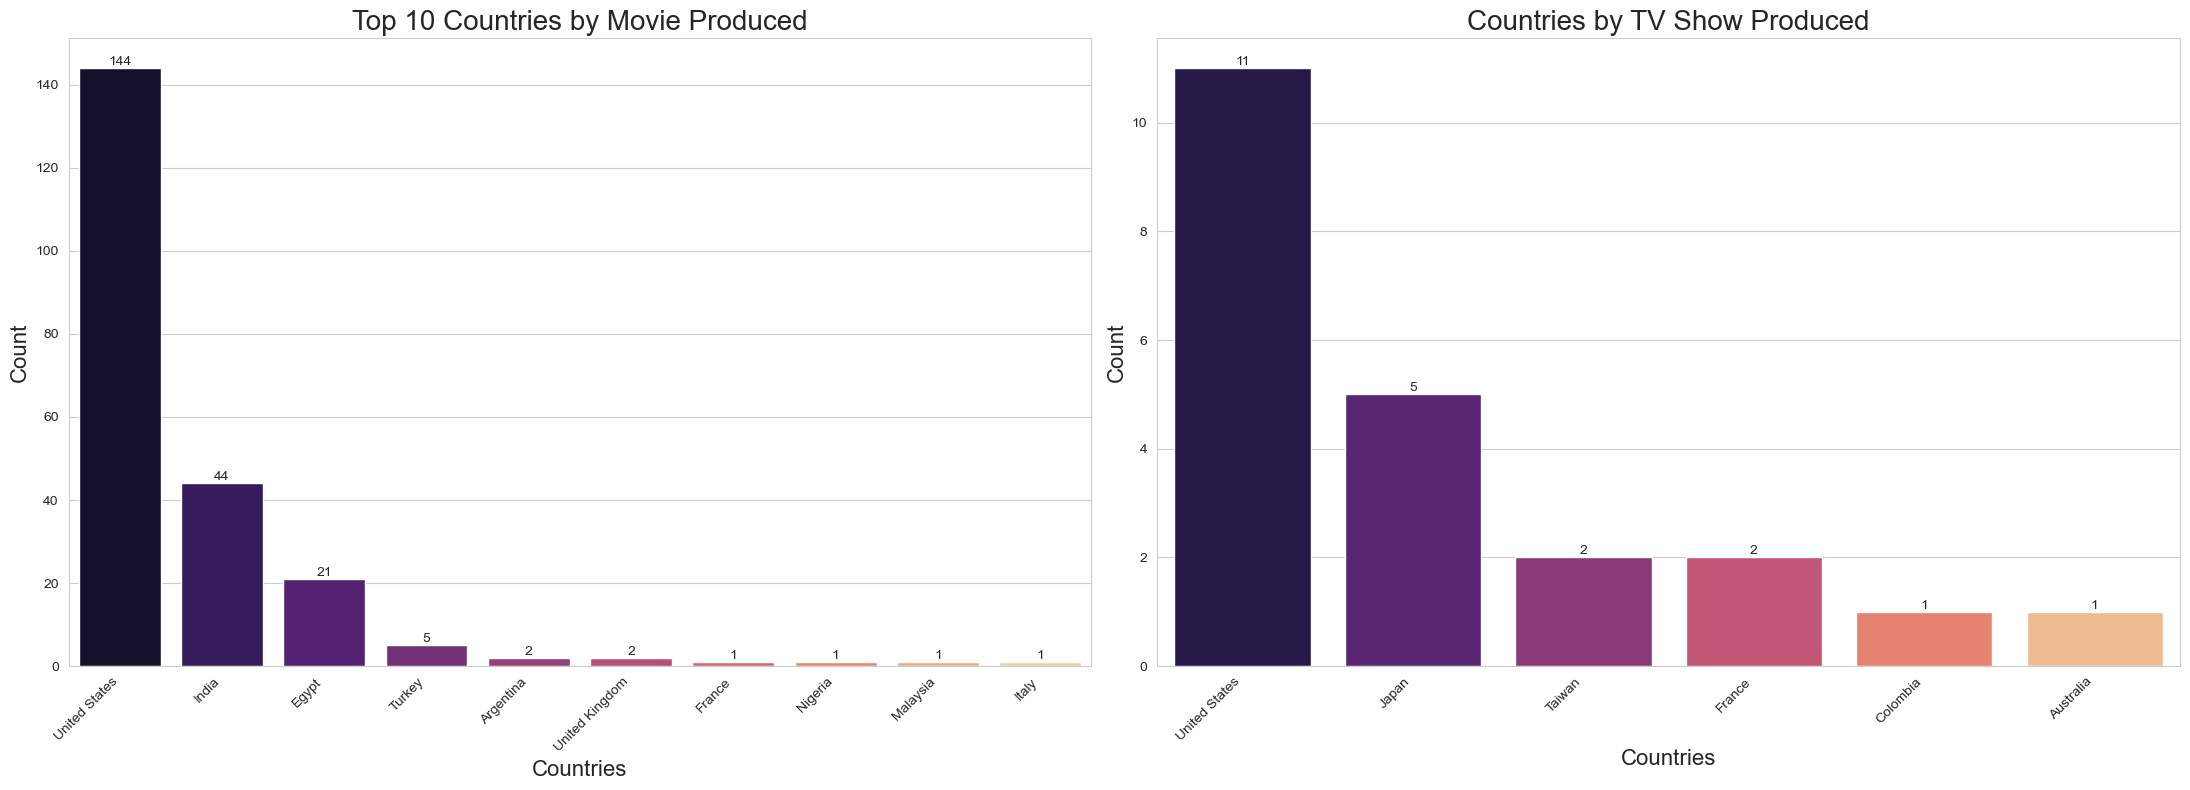

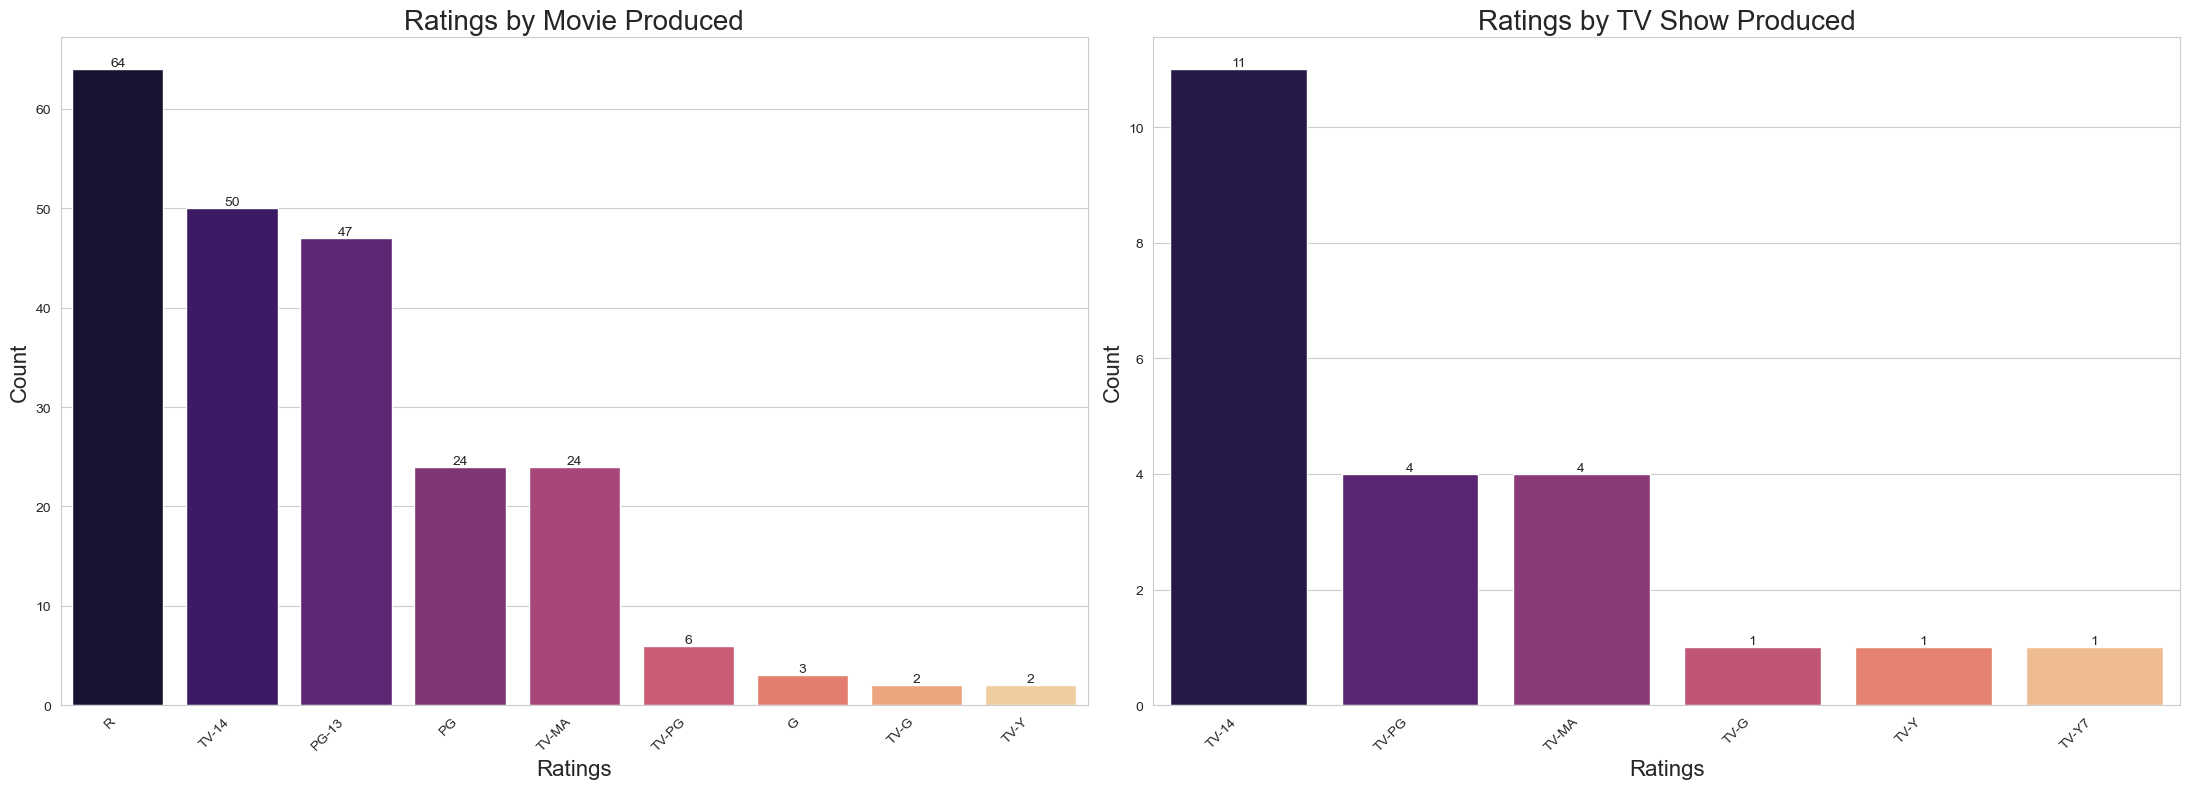

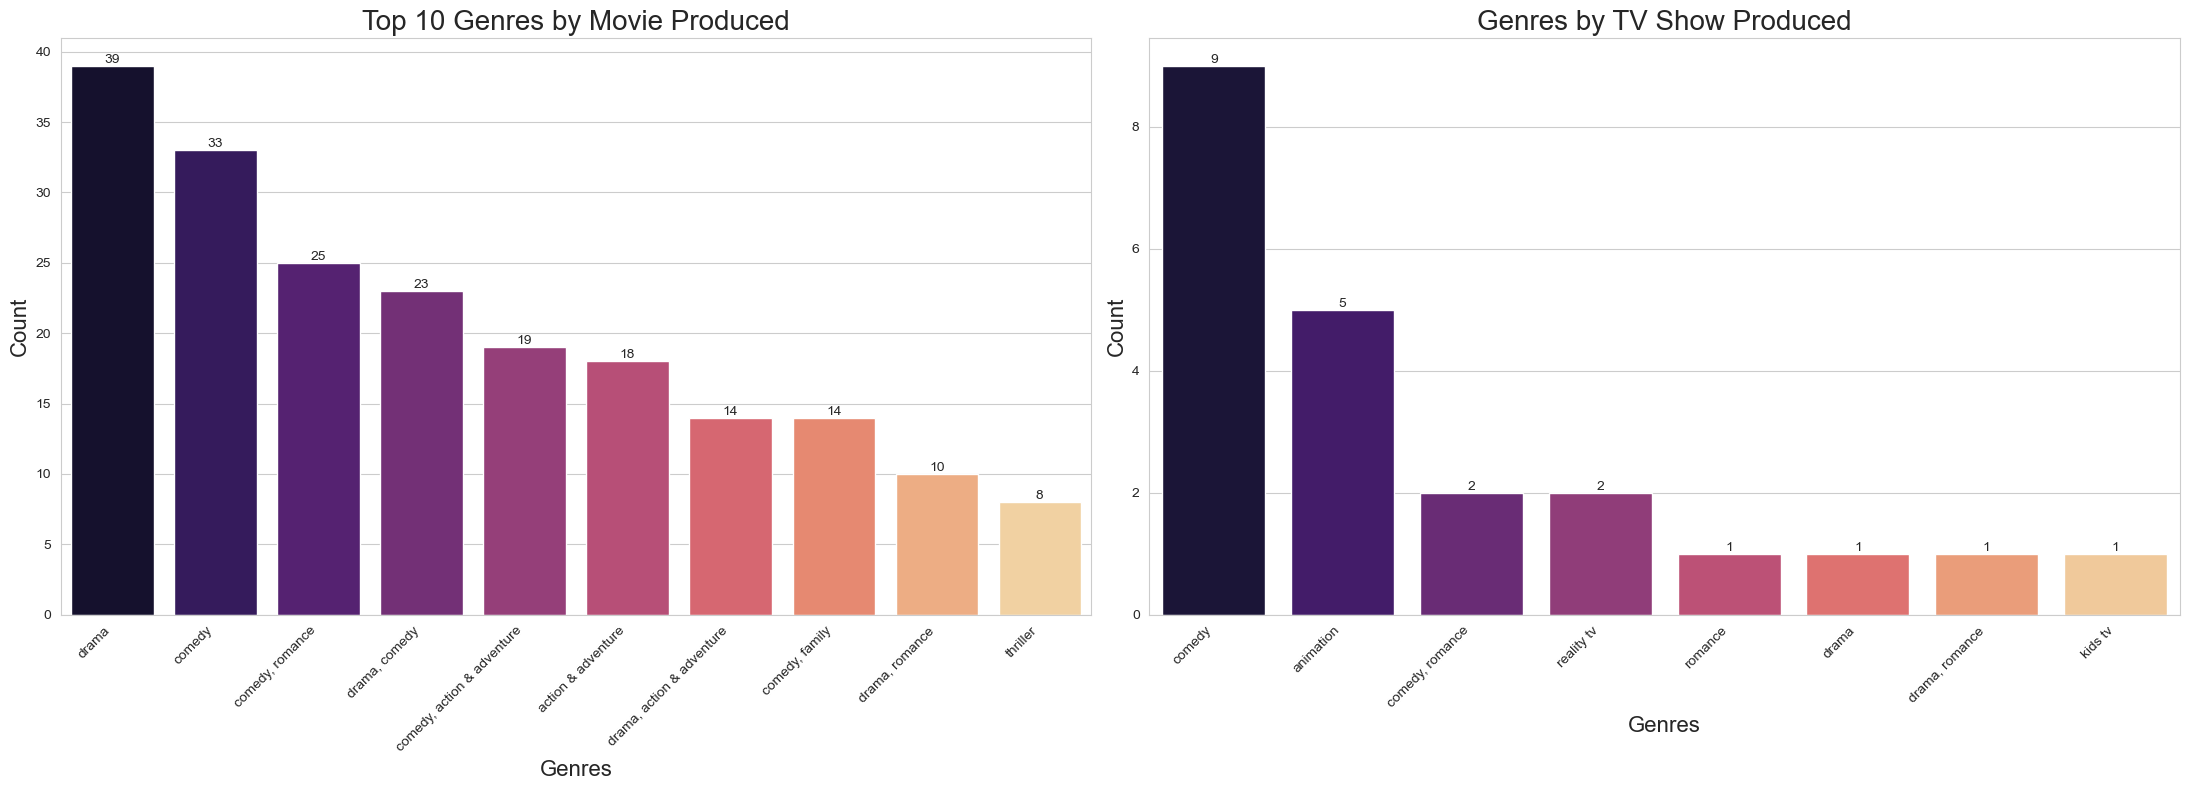

In [47]:
# Create plots for each parameter set for outliers
for params in plot_params:
    fig, ax = plt.subplots(1, 2, figsize=(22, 8))
    plot_count_by_type(speed_outliers, 'Movie', params['column'], params['title'], 0, ax)
    plot_count_by_type(speed_outliers, 'TV Show', params['column'], params['title'], 1, ax)
    plt.tight_layout()
    plt.show()


Outliers to the speed added will be removed from this dataset ...the outliers may be okay for this model, but I will proceed to take them out so I can have I clear dataset

## Remove Outliers

In [48]:
# Filter rows where 'speed_added' is <= upper or >= lower, removing outliers in 'speed_added'
df4 = df3[(df3['speed_added'] <= upper) | (df3['speed_added'] >= lower)]

In [49]:
# Display summary of the filtered DataFrame
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   genre            5384 non-null   object        
 1   type             5384 non-null   object        
 2   country          5384 non-null   object        
 3   date_added       5384 non-null   datetime64[ns]
 4   release_year     5384 non-null   int64         
 5   rating           5384 non-null   object        
 6   duration         5384 non-null   object        
 7   year_added       5384 non-null   int32         
 8   season_added     5384 non-null   object        
 9   age_added        5384 non-null   int64         
 10  release_age      5384 non-null   int64         
 11  speed_added      5384 non-null   int64         
 12  tv_season_count  5384 non-null   int64         
 13  movie_duration   5384 non-null   int64         
 14  fast_add         5384 non-null   int64  

## Check the class balance in the data.

In [50]:
# Drop specified columns from df4
df5 = df4.drop(['date_added', 'release_year', 'duration', 'year_added', 'speed_added', 'release_age', 'age_added'], axis=1)

# Check for class imbalance in 'fast_add'
df5.fast_add.value_counts(normalize=True)

fast_add
1    0.544762
0    0.455238
Name: proportion, dtype: float64

Considering Netflix's content acquisition and strategy, selecting the most appropriate score metric is essential for evaluating the effectiveness of predictive models. Despite our dataset's relatively balanced class distribution, I've carefully weighed the potential costs associated with false positives and false negatives.

If Netflix aims to identify promising titles that can quickly gain popularity on the platform, missing out on fast-added content (false negatives) could lead to lost revenue opportunities and decreased viewer engagement. On the other hand, incorrectly predicting content as fast-added (false positives) may result in unnecessary investments in content acquisition and promotion.

Given the potential impact on Netflix's bottom line and the strategic implications for content planning, choosing a score metric that prioritizes either precision or recall may align with Netflix's objectives. I opted for the F1 score because it provides a comprehensive evaluation by balancing precision and recall. This ensures that both false positives and false negatives are adequately considered in our assessment.


## Feature Transformation

In [51]:
# Convert categorical variables to dummy variables, dropping the first category to avoid multicollinearity
df6 = pd.get_dummies(df5, drop_first=True)

# Model Construction

- Decision Tree
- Random Forest
- Extreme Gradient Boosting
- Compare results from each model

## Decision Tree

### Split Dataset

In [52]:
# Separate the target variable 'fast_add' from the features
y = df6['fast_add']
X = df6.drop(['fast_add'], axis=1)

# Split the data into training and testing sets, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


### Select Hyperparameters for GridSearchCV 

In [53]:
# Initialize a DecisionTreeClassifier with a fixed random seed for reproducibility
tree = DecisionTreeClassifier(random_state=42)

# Define cross-validation parameters for tuning the decision tree
cv_params = {
    'max_depth': [7, 8, 8],                     # Maximum depth of the tree
    'min_samples_split': [2, 5, 6, 7, 8],       # Minimum samples required to split an internal node
    'min_samples_leaf': [6, 7, 8, 9],           # Minimum samples required to be at a leaf node
    'max_features': [8, 9, 12, 14, 15]          # Number of features to consider for the best split
}

# Define scoring metrics for evaluating the model performance
scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

# Set up GridSearchCV to tune the decision tree using cross-validation
tree_cv = GridSearchCV(estimator=tree, param_grid=cv_params, scoring=scoring, cv=10, refit='f1', error_score='raise', verbose=1)


### Fit Training Data

In [54]:
# Fit the decision tree classifier to the training data
tree_cv.fit(X_train, y_train)


Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [7, 8, 8],
                         'max_features': [8, 9, 12, 14, 15],
                         'min_samples_leaf': [6, 7, 8, 9],
                         'min_samples_split': [2, 5, 6, 7, 8]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'],
             verbose=1)

### Confusion Matrix

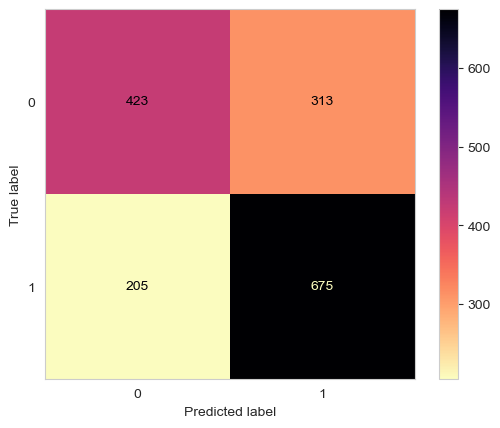

In [58]:
# Create a confusion matrix plot
# Define a function to plot the confusion matrix using seaborn
def conf_matrix_plot(model, x_data, y_data):
    # Generate predictions using the model
    model_pred = model.predict(x_data)
    # Calculate confusion matrix with correct labels
    cm = confusion_matrix(y_data, model_pred, labels=[0, 1])
    # Create ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    # Create subplots
    fig, ax = plt.subplots()
    # Plot the confusion matrix with reversed magma color palette
    disp.plot(ax=ax, values_format='', cmap='magma_r')
    # Turn off gridlines
    ax.grid(False)
    # Show the plot
    plt.show()

# Call the function to plot confusion matrix for the best decision tree estimator
conf_matrix_plot(tree_cv.best_estimator_, X_test, y_test)


### Review Metrics

In [59]:
# Create helper function to evalute the model

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [60]:
# Evaluate the model on the test data
test_scores = make_results('decision tree cv',tree_cv,'f1')
test_scores


,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.707836,0.753059,0.729149,0.695323,0.743039


### Decision Tree Model Confusion Matrix Interpretation


**True Positives**: 675
- These are the number of instances correctly predicted as being fast-added titles. The model correctly identified 675 titles as being added quickly to Netflix.

**True Negatives**: 423
- These are the number of instances correctly predicted as not being fast-added titles. In other words, the model correctly identified 423 titles as not being added quickly to Netflix.

**False Positives**: 313
- These are the number of instances incorrectly predicted as being fast-added titles when they actually are not. The model mistakenly identified 313 titles as being added quickly to Netflix when they were not.

**False Negatives**: 205
- These are the number of instances incorrectly predicted as not being fast-added titles when they actually are. The model failed to identify 205 titles that were added quickly to Netflix.

The confusion matrix indicates that the model has a relatively high number of true positives and true negatives, suggesting that it performs reasonably well in predicting whether a title will be added quickly to Netflix. However, there are also notable false negatives and false positives, indicating areas where the model could be improved.

### Plot Tree

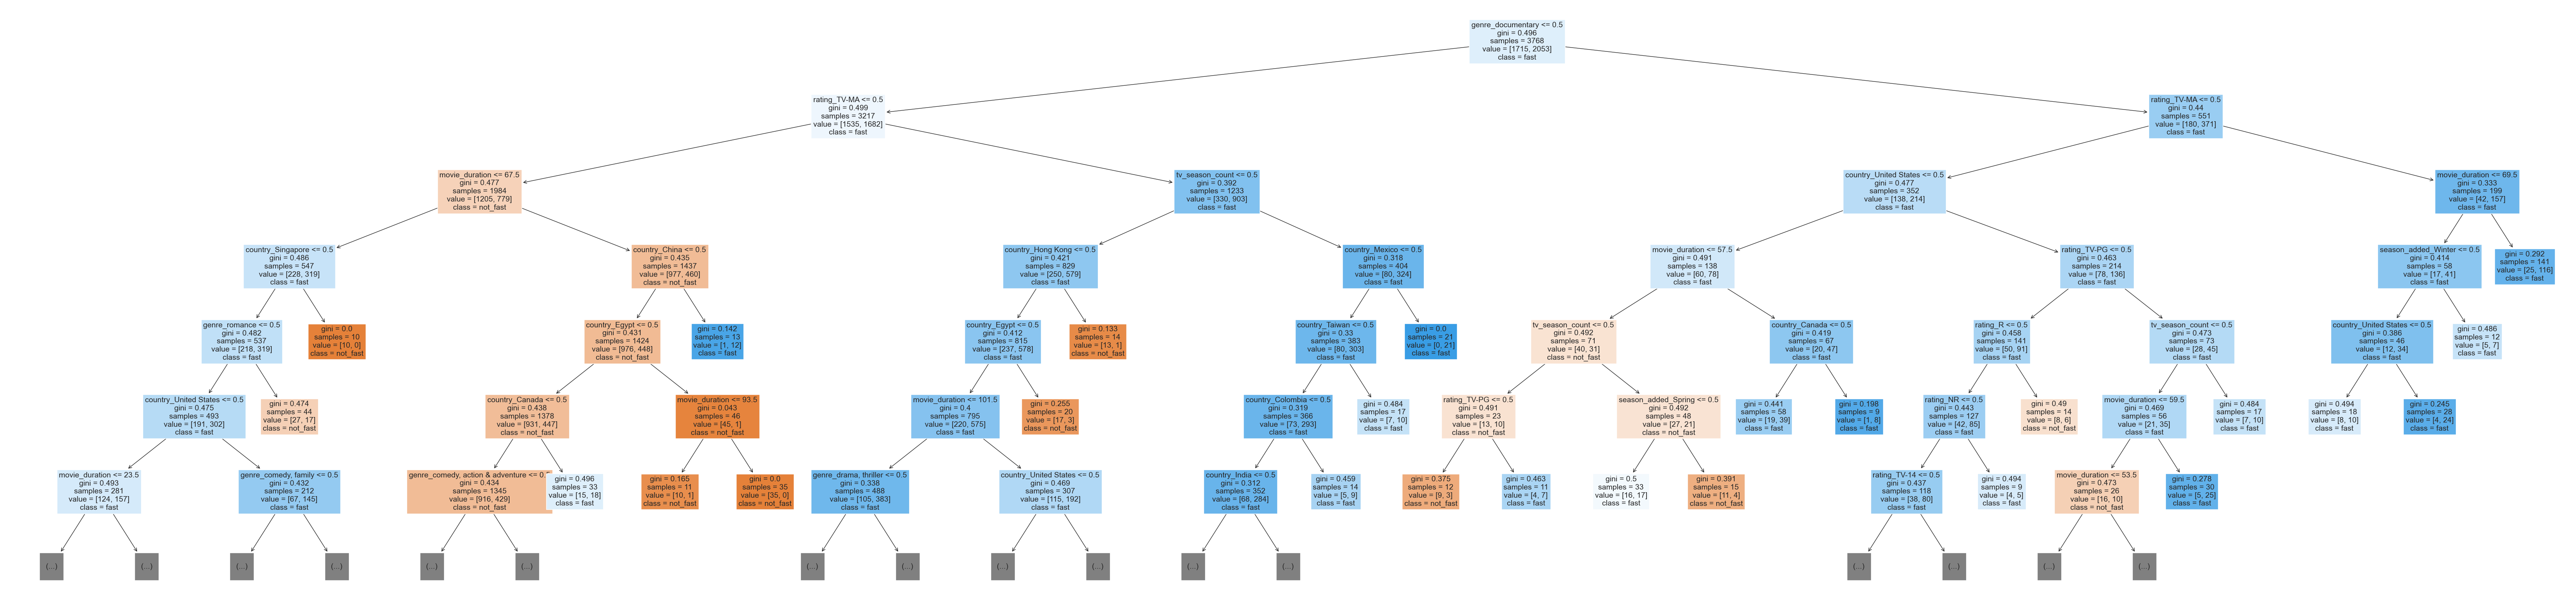

In [61]:
# Convert column names to a list of strings
X_columns_list = X.columns.astype('str').tolist()

# Assign feature names for the plot
feature_names_list = X_columns_list

# Set the figure size for the plot
plt.figure(figsize=(85, 20))

# Plot the decision tree with specified parameters
plot_tree(tree_cv.best_estimator_, max_depth=6, fontsize=14, feature_names=feature_names_list, 
          class_names=['not_fast', 'fast'], filled=True)

# Display the plot
plt.show()


### Analyze Feature Importance

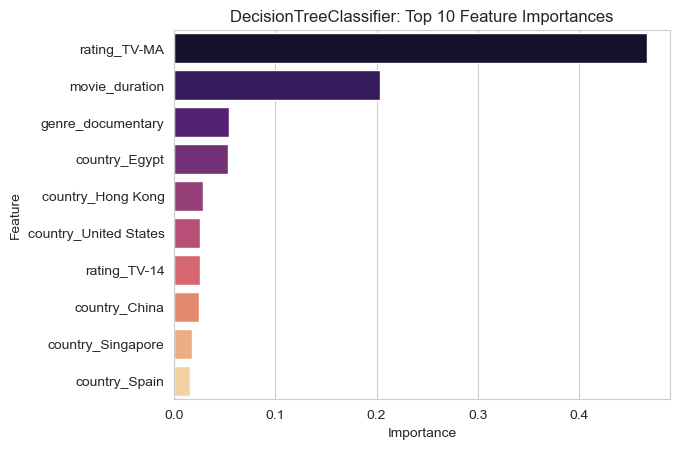

In [62]:
def plot_feature_importances(model, X, top_n=10, palette='magma'):
    # Extract feature importances
    importances = pd.DataFrame(model.feature_importances_, columns=['gini_importance'], index=X.columns)
    # Sort the features by importance
    importances = importances.sort_values(by='gini_importance', ascending=False)
    # Select the top n features
    top_importances = importances.head(top_n)
    # Plot the top feature importances
    sns.barplot(data=top_importances, x="gini_importance", y=top_importances.index, orient='h', palette=palette)
    # Set plot title and labels
    plt.title(f"{model.__class__.__name__}: Top {top_n} Feature Importances", fontsize=12)
    plt.ylabel("Feature")
    plt.xlabel("Importance")
    # Show the plot
    plt.show()

# Call the function to plot top feature importances for decision tree
plot_feature_importances(tree_cv.best_estimator_, X)



The barplot above shows that in this decision tree model, `rating_TV-MA`, `movie_duration`, `genre_documentary`, and `genre_documentary` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `fast_add`.

Excluding `movie_duration` maybe is justified as it's unlikely to affect how quickly Netflix acquires titles. Genre drive acquisition speed, while duration's impact is minimal and its inclusion could lead to overfitting or bias. Simplifying the model without it improves interpretability and accuracy in predicting acquisition speed.

In [63]:
# Remove 'movie_duration' feature from the feature set
X_2 = X.drop('movie_duration', axis=1)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y, stratify=y, test_size=0.3, random_state=42)

tree2 = DecisionTreeClassifier(random_state=42)

tree2_cv = GridSearchCV(estimator=tree2, param_grid=cv_params, scoring=scoring, cv=10, refit='f1', error_score='raise', verbose=1)

tree2_cv.fit(X_train2,y_train2)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [7, 8, 8],
                         'max_features': [8, 9, 12, 14, 15],
                         'min_samples_leaf': [6, 7, 8, 9],
                         'min_samples_split': [2, 5, 6, 7, 8]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'],
             verbose=1)

In [64]:
tree2_cv_scores = make_results('decision tree cv2', tree2_cv, 'f1')


# Concatenate the new results with the existing test scores DataFrame
test_scores = pd.concat([test_scores, tree2_cv_scores], axis=0)

# Display the updated test scores
test_scores

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.707836,0.753059,0.729149,0.695323,0.743039
0,decision tree cv2,0.669379,0.821229,0.736878,0.680177,0.734742


Removing `movie_duration` significantly improved the recall score, thus improving the F1 score.

In [65]:
def calculate_confusion_matrix_metrics(model, X_test, y_test):
    # Predict the test set labels
    y_pred = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Extract the true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = cm.ravel()

    return tp, tn, fp, fn

tp, tn, fp, fn = calculate_confusion_matrix_metrics(tree2_cv.best_estimator_, X_test2, y_test2)
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

True Positives: 690
True Negatives: 377
False Positives: 359
False Negatives: 190


## Random Forest

### Split Data Set

In [66]:
# Random Forest Classifier
# Define parameters for GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 150],        # Number of trees
    'max_depth': [10, 15, 20],             # Max depth of each tree
    'min_samples_split': [2, 5, 8],        # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Min samples required at a leaf node
    'max_features': [4, 6, 8],             # Number of features to consider for split
}

# Define scoring metrics for evaluation
scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

# GridSearchCV for Random Forest model
rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, 
                     scoring=scoring, cv=5, refit='f1', n_jobs=-1, verbose=1)


### Fit Training Data

In [67]:
# Fit training data to Random Forest model
rf_cv.fit(X_train2,y_train2)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 150]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'],
             verbose=1)

### Confusion Matrix

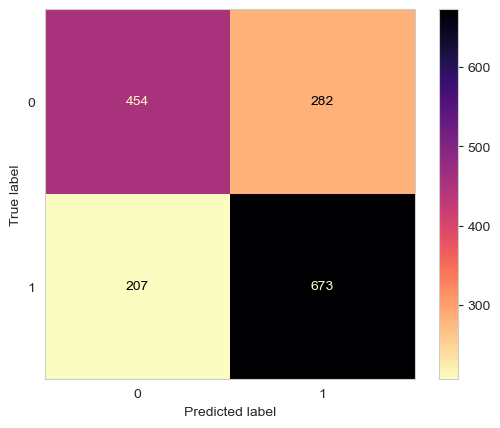

In [68]:
# Plot the confusion matrix for the random forrest model using the test data
conf_matrix_plot(rf_cv.best_estimator_, X_test2, y_test2)

In [69]:
# Generate and store the results for the Random Forest model with cross-validation
rf_cv_scores = make_results('random forest cv', rf_cv, 'f1')

# Concatenate the new results with the existing test scores DataFrame
test_scores = pd.concat([test_scores, rf_cv_scores], axis=0).reset_index(drop=True)

# Display the updated test scores
test_scores


,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.707836,0.753059,0.729149,0.695323,0.743039
1,decision tree cv2,0.669379,0.821229,0.736878,0.680177,0.734742
2,random forest cv,0.723925,0.781271,0.751285,0.718410,0.771525


### Random Forest Model Results Compared with Decision Tree

| Model           | True Positives (TP) | True Negatives (TN) | False Positives (FP) | False Negatives (FN) |
|-----------------|---------------------|---------------------|----------------------|----------------------|
| Decision Tree   | 675                 | 423                 | 313                  | 205                  |
| Decision Tree 2 | 690                 | 377                 | 359                  | 190                  |
| Random Forest   | 673                 | 454                 | 282                  | 207                  |



Decision Tree: With an F1 score of 0.723, the Decision Tree has balanced precision and recall, slightly favoring recall.

Decision Tree 2: Achieves a lower F1 score of 0.716, despite having the highest true positives, because its precision is negatively impacted by the higher false positives.

Random Forest: With the highest F1 score of 0.734, the Random Forest model balances precision and recall the best among the three models, making it the most reliable model in terms of the F1 metric.


### Feature Importances

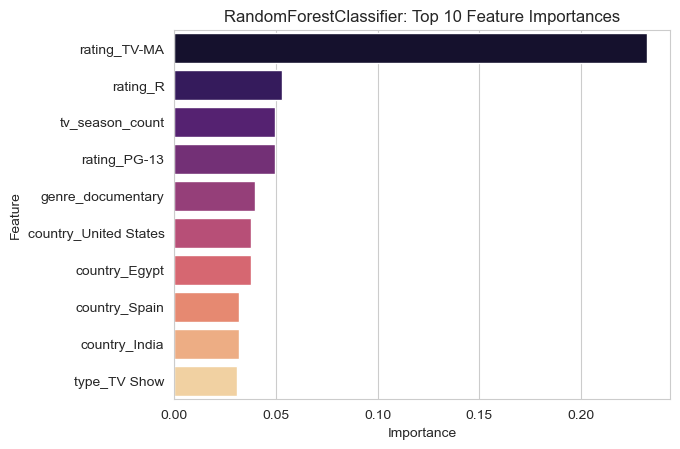

In [70]:
# Call the function to extract top feature importances for random forest
plot_feature_importances(rf_cv.best_estimator_, X_2)


The plot above shows that in this random forest model, `rating_TV-MA`, `rating_R`, and `tv_season_count` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `fast_add`. `rating_TV-MA` is the most important feature in both the random forest model and the decision tree model.

## XGBoosting

### Fit Training Data

In [71]:
# Define the XGBoosting Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define a concise hyperparameters grid to ensure quick fitting
param_grid = {
    'n_estimators': [50, 100],              # Number of trees
    'max_depth': [3, 5],                    # Maximum depth of each tree
    'learning_rate': [0.01, 0.1],           # Learning rate (eta)
    'subsample': [0.8, 0.9],                # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9],         # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1],                      # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.01],                 # L1 regularization term on weights
    'reg_lambda': [1, 1.5]                  # L2 regularization term on weights
}


# Set up GridSearchCV with fewer folds
xgb_cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scoring, refit='f1', cv=5, n_jobs=-1, verbose=1)

# Fit the model to the training data
xgb_cv.fit(X_train2, y_train2)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'reg_alpha': [0, 0.01],
                         'reg_lambda': [1, 1.5], 'subsample': [0.8, 0.9]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'],
             verbose=1)

### Confusion Matrix

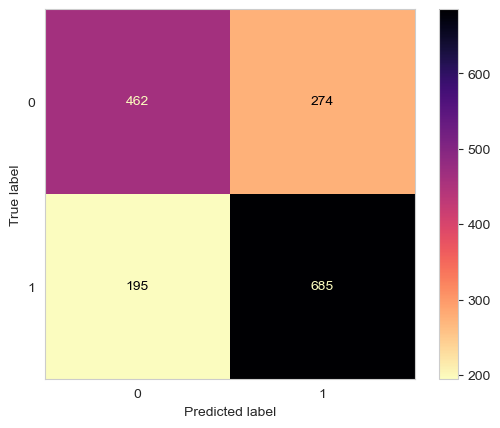

In [72]:
# Plot the confusion matrix for the XGBoost model using the test data
conf_matrix_plot(xgb_cv.best_estimator_, X_test2, y_test2)

In [73]:
# Function to generate results from the cross-validated model
xgb_cv_scores = make_results('extreme gradient boosting cv', xgb_cv, 'f1')

# Concatenate the new scores with the existing test_scores DataFrame
test_scores = pd.concat([test_scores, xgb_cv_scores], axis=0)



# Display the updated test_scores DataFrame
test_scores.reset_index(drop=True, inplace=True)

test_scores


,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.707836,0.753059,0.729149,0.695323,0.743039
1,decision tree cv2,0.669379,0.821229,0.736878,0.680177,0.734742
2,random forest cv,0.723925,0.781271,0.751285,0.718410,0.771525
3,extreme gradient boosting cv,0.721622,0.769584,0.744624,0.712573,0.770711


### XGBoost Results Compared with other models


| Model           | True Positives (TP) | True Negatives (TN) | False Positives (FP) | False Negatives (FN) |
|-----------------|---------------------|---------------------|----------------------|----------------------|
| Decision Tree   | 675                 | 423                 | 313                  | 205                  |
| Decision Tree 2 | 690                 | 377                 | 359                  | 190                  |
| Random Forest   | 673                 | 454                 | 282                  | 207                  |
| XGBoost         | 685                 | 462                 | 274                  | 195                  |


In comparing the performance of the Decision Tree, Random Forest, and XGBoost models, the Random Forest model emerged with the highest F1 score, which was the primary metric of evaluation. This indicates its superior balance between precision and recall in predicting fast-added titles on Netflix. While the XGBoost model showed slight improvements in True Positives and False Negatives, the Random Forest's performance make it the best choice. 

Text(0.5, 1.0, 'XGBoost: Top 10 Feature Importances for Fast Title Acquisition')

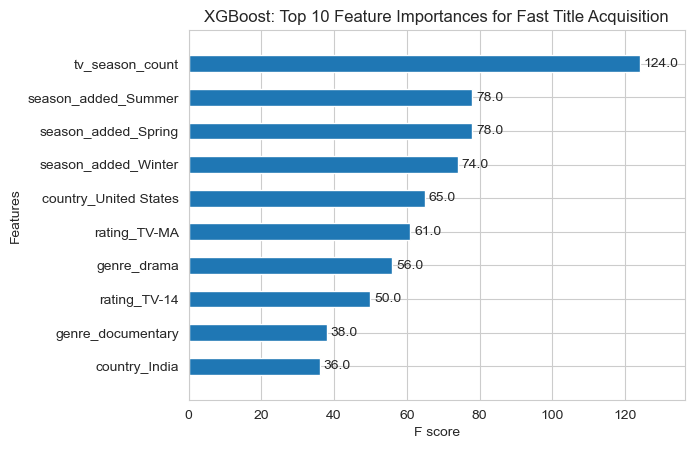

In [74]:
# Plot the top 10 feature importances using the XGBoost model
plot_importance(xgb_cv.best_estimator_, max_num_features=10, height=0.5)

# Set the title of the plot
plt.title("XGBoost: Top 10 Feature Importances for Fast Title Acquisition", fontsize=12)


# Summary of Model Results

**Decision Trees**:

The decision tree model achieved a precision of 70.7%, recall of 75.3%, an F1-score of 72.9%, and accuracy of 69% on the test set. After removing the `movie_duration` feature, recall increase to 82.1%, and the F1-score increase to 73.6%.


**Random Forest**:

The random forest model achieved an AUC of 77.1%, precision of 72.3%, recall of 78.1%, an F1-score of 75.1%, and accuracy of 72.3% on the test set. The random forest outperformed the decision tree model.

**Extreme Gradient Boosting (XGBoost)**:

The XGBoost model achieved an AUC of 77.0%, precision of 72.1%, recall of 76.9%, an F1-score of 74.4%, and accuracy of 71.2% on the test set. XGBoost performed better than the decision tree estimator; however, the random forest model still surpassed it in all target metrics.


### Conclusion, Recommendations, Next Steps

#### Conclusion

The preference for TV-MA or R-rated content among viewers indicates a strong demand for mature-themed programming. Netflix should prioritize acquiring these titles to meet demand, enhance its appeal to mature audiences, and increase viewer engagement and subscriber retention. This strategy also provides a competitive edge in the streaming market. Diversifying the overall content offering is also crucial.

#### Recommendations for Data Collection and Analysis

- **Viewer Engagement**: Collect data on watch time, completion rates, and viewer ratings to identify titles that keep viewers hooked.
- **Social Media Trends**: Incorporate data from social media and online discussions to gauge pre-release buzz and ongoing viewer interest.
- **Regional Preferences**: Collect data on geographic trends to tailor acquisitions to different markets.
- **Production Quality**: Gather information on production budgets and perceived quality as indicators of potential success.
- **Awards and Nominations**: Use historical data on awards and nominations to predict a title’s popularity.
- **Marketing Impact**: Analyze data on the extent and type of promotion a title received to understand the impact of marketing efforts on acquisition speed.

#### Next Steps / Model improvements

- **Feature Engineering**: Create interaction features between genres and countries to capture the combined influence of a genre being popular in a specific country. Combine genres with ratings to understand which types of content in specific genres are more likely to be fast-added.
  
- **Seasonality Analysis**: The dataset only had the year added to Netflix. Pulling detailed dates could allow for seasonality analysis in relation to the speed of being added to Netflix.
  
- **Evaluation Metric**: Further insight into Netflix's goals will help determine the best evaluation metric. The F1 score was used as it balances precision and recall. However, tailoring the model to prioritize either precision or recall can better align with Netflix’s strategic goals:
  - **Minimize False Positives (Optimize Precision)**: Ensures resources are invested in titles with a higher likelihood of quick popularity.
  - **Minimize False Negatives (Optimize Recall)**: Ensures potential hit titles are not overlooked.

Understanding specific business priorities will guide the adjustment of model parameters and thresholds to better serve Netflix’s content acquisition strategy.
